In [3]:
import torch 
import torchvision
import torchvision.transforms as transforms 


Using the CIFAR 10 dataset 
https://www.cs.toronto.edu/~kriz/cifar.html

In [7]:

transform = transforms.Compose([ transforms.ToTensor () ,
                            transforms.Normalize ((0.5 , 0.5 , 0.5) , (0.5 , 0.5 , 0.5) ) ])


In [8]:
trainset = torchvision . datasets .CIFAR10( root='./data', train=True ,
            download=True , transform=transform ) 
testset = torchvision . datasets .CIFAR10( root='./data', train=False ,
            download=True , transform=transform )

Files already downloaded and verified


In [24]:
import pickle
import os
import numpy as np

In [31]:
data_path = "./data/"
########################################################################
# Various constants for the size of the images.
# Use these constants in your own program.

# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

########################################################################
# Various constants used to allocate arrays of the correct size.

# Number of files for the training-set.
_num_files_train = 5

# Number of images for each batch-file in the training-set.
_images_per_file = 10000

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

In [26]:
def _get_file_path(filename=""):
    """
    Return the full path of a data-file for the data-set.
    If filename=="" then return the directory of the files.
    """

    return os.path.join(data_path, "cifar-10-batches-py/", filename)

In [28]:
# Convert the data into a numpy array
def _unpickle(filename):
    """
    Unpickle the given file and return the data.
    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data


In [98]:
def _convert_images(raw):
    raw_float = np.array(raw,dtype=float)/255
    #raw_float = np.array(raw,dtype=float)
    #Reshape the image into 4 dimension
    
    images = raw_float.reshape([-1, num_channels, img_size, img_size])
    images = images.transpose([0,2,3,1])
    return images
    
    

In [66]:
def one_hot_encoded(class_numbers, num_classes=None):
    """
    Generate the One-Hot encoded class-labels from an array of integers.
    For example, if class_number=2 and num_classes=4 then
    the one-hot encoded label is the float array: [0. 0. 1. 0.]
    :param class_numbers:
        Array of integers with class-numbers.
        Assume the integers are from zero to num_classes-1 inclusive.
    :param num_classes:
        Number of classes. If None then use max(class_numbers)+1.
    :return:
        2-dim array of shape: [len(class_numbers), num_classes]
    """

    # Find the number of classes if None is provided.
    # Assumes the lowest class-number is zero.
    if num_classes is None:
        num_classes = np.max(class_numbers) + 1

    return np.eye(num_classes, dtype=float)[class_numbers]

In [47]:
def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])
    
    images = _convert_images(images)

    return images, cls

In [29]:
def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.
    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names

In [65]:
def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.
    The data-set is split into 5 data-files which are merged here.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    for i in range(_num_files_train):
        # Load the images and class-numbers from the data-file.
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))

        # Number of images in this batch.
        num_images = len(images_batch)

        # End-index for the current batch.
        end = begin + num_images
        
        print(end)
        # Store the images into the array.
        images[begin:end, :] = images_batch

        # Store the class-numbers into the array.
        cls[begin:end] = cls_batch

        # The begin-index for the next batch is the current end-index.
        begin = end

    return images, cls, one_hot_encoded(class_numbers = cls, num_classes=num_classes)
    

In [67]:
def load_test_data():
    """
    Load all the test-data for the CIFAR-10 data-set.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    images, cls = _load_data(filename="test_batch")

    return images, cls, one_hot_encoded(class_numbers = cls, num_classes=num_classes)

In [37]:
class_names = load_class_names()
class_names

Loading data: ./data/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [99]:
images_train, cls_train, labels_train = load_training_data()

Loading data: ./data/cifar-10-batches-py/data_batch_1
10000
Loading data: ./data/cifar-10-batches-py/data_batch_2
20000
Loading data: ./data/cifar-10-batches-py/data_batch_3
30000
Loading data: ./data/cifar-10-batches-py/data_batch_4
40000
Loading data: ./data/cifar-10-batches-py/data_batch_5
50000


In [100]:
images_test, cls_test, labels_test = load_test_data()

Loading data: ./data/cifar-10-batches-py/test_batch


In [101]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(images_train)))
print("- Test-set:\t\t{}".format(len(images_test)))

Size of:
- Training-set:		50000
- Test-set:		10000


In [102]:
print("Type of")
print("-Training images:\t{}, shape {}".format(type(images_train),images_train.shape))
print("-Training images:\t{}, shape {}".format(type(images_test),images_test.shape))

Type of
-Training images:	<class 'numpy.ndarray'>, shape (50000, 32, 32, 3)
-Training images:	<class 'numpy.ndarray'>, shape (10000, 32, 32, 3)


In [73]:
print(cls_train)

[6 9 9 ... 9 1 1]


In [80]:
print(type(labels_train.shape))

<class 'tuple'>


In [96]:
images_test[0].size

3072

<b> Plot Images </b>

In [106]:
import matplotlib.pyplot as plt 

In [107]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true) == 9

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

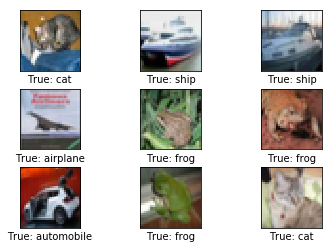

In [108]:
# Get the first images from the test-set.
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

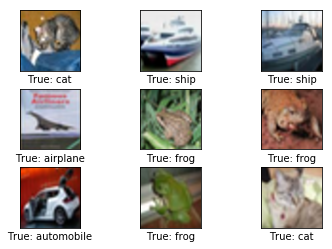

In [109]:
plot_images(images=images, cls_true=cls_true, smooth=True)

<h3>Neural Network Implementation </h3>

In [135]:
#Paramters for the neural network
numberOfHiddenLayers = 2
neurons_layer_one = 30
neurons_layer_two = 15
neurons_output_layer = 10;


In [148]:
class NeuralNetwork:
    def __init__(self,X,y):
        self.input = X;
        self.output = y;
        self.hidden_layers = numberOfHiddenLayers;
        self.neurons_layer_one = neurons_layer_one;
        self.neurons_layer_two = neurons_layer_two;
        self.weight_layer_one = 2*np.random.random((len(X),neurons_layer_one))-1
        self.weight_layer_two = 2*np.random.random((neurons_layer_one,neurons_layer_two))-1
        self.weight_layer_output = 2*np.random.random((neurons_layer_two,neurons_output_layer))-1
        
    def affineForward(self,A,W,b):
        pass
    
    
    def activationForward(self, A, activation="relu"):
        pass
    
    def forwardPropagation(self,X):
        pass

In [122]:
poc_image_trainset = 100;
poc_labels_trainset = 100;

In [121]:

images_trainset = images_train[:poc_image_trainset]
len(images_trainset)

100

In [123]:
labels_trainset = labels_train[:poc_labels_trainset]
len(labels_trainset)

100

In [143]:
model = NeuralNetwork(images_trainset,labels_trainset)

In [144]:
print("Size of Weights")
print("Layer one shape:{}".format(model.weight_layer_one.shape))
print("Layer two shape:{}".format(model.weight_layer_two.shape))
print("Layer output shape:{}".format(model.weight_layer_output.shape))

Size of Weights
Layer one shape:(100, 30)
Layer two shape:(30, 15)
Layer output shape:(15, 10)


In [145]:
W1 = model.weight_layer_one
W2 = model.weight_layer_two
W3 = model.weight_layer_output